# Modelo con los modelos obtenidos con BoW

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score, auc
import scipy.stats as st
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

from scipy import sparse

In [2]:
X_train = sparse.load_npz("./Data/X_train_BoW.npz")
X_test = sparse.load_npz("./Data/X_test_BoW.npz")
y_train = pd.read_csv("./Data/y_train.csv", header=None)
y_test = pd.read_csv("./Data/y_test.csv", header=None)

In [3]:
y_train = y_train[0]
y_test = y_test[0]

In [4]:
BoW_NB = joblib.load('./Modelos/BoW/BoW_NB.sav')
BoW_LR = joblib.load('./Modelos/BoW/BoW_LR.sav')
BoW_RF = joblib.load('./Modelos/BoW/BoW_RF.sav')
BoW_AB = joblib.load('./Modelos/BoW/BoW_AB.sav')
BoW_XGB = joblib.load('./Modelos/BoW/BoW_XGB.sav')
BoW_LGBM = joblib.load('./Modelos/BoW/BoW_LGBM_optimizado.sav')

In [5]:
X_train_probas = pd.DataFrame()
X_test_probas = pd.DataFrame()

In [6]:
X_train_probas['BoW_NB'] = BoW_NB.predict_proba(X_train)[:,1]
X_train_probas['BoW_LR'] = BoW_LR.predict_proba(X_train)[:,1]
X_train_probas['BoW_RF'] = BoW_RF.predict_proba(X_train)[:,1]
X_train_probas['BoW_AB'] = BoW_AB.predict_proba(X_train)[:,1]
X_train_probas['BoW_XGB'] = BoW_XGB.predict_proba(X_train.astype('float32'))[:,1]
X_train_probas['BoW_LGBM'] = BoW_LGBM.predict_proba(X_train.astype('float32'))[:,1]

In [7]:
X_test_probas['BoW_NB'] = BoW_NB.predict_proba(X_test)[:,1]
X_test_probas['BoW_LR'] = BoW_LR.predict_proba(X_test)[:,1]
X_test_probas['BoW_RF'] = BoW_RF.predict_proba(X_test)[:,1]
X_test_probas['BoW_AB'] = BoW_AB.predict_proba(X_test)[:,1]
X_test_probas['BoW_XGB'] = BoW_XGB.predict_proba(X_test.astype('float32'))[:,1]
X_test_probas['BoW_LGBM'] = BoW_LGBM.predict_proba(X_test.astype('float32'))[:,1]

In [8]:
X_train_probas.sample(5)

,BoW_NB,BoW_LR,BoW_RF,BoW_AB,BoW_XGB,BoW_LGBM
613010,0.148244,0.089172,0.513614,0.492603,0.078594,0.085909
527944,0.028984,0.029481,0.502285,0.489783,0.025035,0.025592
894990,0.006164,0.004080,0.478708,0.485026,0.006070,0.003948
168422,0.000094,0.000715,0.445028,0.436855,0.002945,0.000995
1229561,0.028984,0.029481,0.502285,0.489783,0.025035,0.025592


In [9]:
X_test_probas.dtypes

BoW_NB      float64
BoW_LR      float64
BoW_RF      float64
BoW_AB      float64
BoW_XGB     float32
BoW_LGBM    float64
dtype: object

In [10]:
se = StandardScaler()
X_train_probas = se.fit_transform(X_train_probas)
X_test_probas = se.transform(X_test_probas)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [12]:
model = GridSearchCV(LogisticRegression(), params, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3)
print (model)
result = model.fit(X_train_probas, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:   32.1s remaining:   42.8s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:   36.8s remaining:   27.6s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:   40.8s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:   49.9s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   50.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   50.9s finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print ("Mejor Modelo: ",result.best_estimator_)
print ("AUC: ",result.best_score_)
y_pred = result.predict(X_test_probas)
print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
print ("Accuracy: ",accuracy_score(y_test, y_pred))
print ("Recall: ",recall_score(y_test, y_pred))
print ("Precision: ",precision_score(y_test, y_pred),"\n")
y_probs = result.predict_proba(X_test_probas)[:,1]

Mejor Modelo:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC:  0.8899694941870694
Matriz de Confusión:
 [[599704   1806]
 [ 18272   1591]]
Accuracy:  0.9676876851746052
Recall:  0.08009867593012134
Precision:  0.46835443037974683 



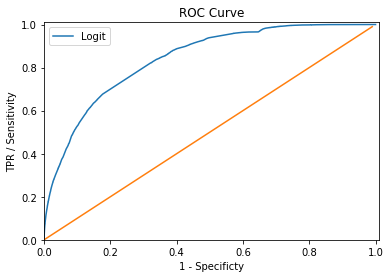

In [14]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Logit'])
plt.show()

In [15]:
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-Logit= 0.8401065055517913


In [16]:
joblib.dump(result, './Modelos/Ensamble/Ensamble_LR.sav')

['./Modelos/Ensamble/Ensamble_LR.sav']

## Agrego los resultados obtenidos con Tf-idf

In [17]:
Tfidf_NB = joblib.load('./Modelos/Tf-idf/Tf-idf_NB.sav')
Tfidf_LR = joblib.load('./Modelos/Tf-idf/Tf-idf_LR.sav')
Tfidf_RF = joblib.load('./Modelos/Tf-idf/Tf-idf_RF.sav')
Tfidf_AB = joblib.load('./Modelos/Tf-idf/Tf-idf_AB.sav')
Tfidf_XGB = joblib.load('./Modelos/Tf-idf/Tf-idf_XGB.sav')
Tfidf_LGBM = joblib.load('./Modelos/Tf-idf/Tf-idf_LGBM.sav')

In [18]:
X_train_probas = pd.DataFrame(X_train_probas)
X_test_probas = pd.DataFrame(X_test_probas)

In [19]:
X_train_probas['Tf-idf_NB'] = Tfidf_NB.predict_proba(X_train)[:,1]
X_train_probas['Tf-idf_LR'] = Tfidf_LR.predict_proba(X_train)[:,1]
X_train_probas['Tf-idf_RF'] = Tfidf_RF.predict_proba(X_train)[:,1]
X_train_probas['Tf-idf_AB'] = Tfidf_AB.predict_proba(X_train)[:,1]
X_train_probas['Tf-idf_XGB'] = Tfidf_XGB.predict_proba(X_train.astype('float32'))[:,1]
X_train_probas['Tf-idf_LGBM'] = Tfidf_LGBM.predict_proba(X_train.astype('float32'))[:,1]

In [20]:
X_test_probas['Tf-idf_NB'] = Tfidf_NB.predict_proba(X_test)[:,1]
X_test_probas['Tf-idf_LR'] = Tfidf_LR.predict_proba(X_test)[:,1]
X_test_probas['Tf-idf_RF'] = Tfidf_RF.predict_proba(X_test)[:,1]
X_test_probas['Tf-idf_AB'] = Tfidf_AB.predict_proba(X_test)[:,1]
X_test_probas['Tf-idf_XGB'] = Tfidf_XGB.predict_proba(X_test.astype('float32'))[:,1]
X_test_probas['Tf-idf_LGBM'] = Tfidf_LGBM.predict_proba(X_test.astype('float32'))[:,1]

In [21]:
se = StandardScaler()
X_train_probas = se.fit_transform(X_train_probas)
X_test_probas = se.transform(X_test_probas)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [23]:
model = GridSearchCV(LogisticRegression(), params, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3)
print (model)
result = model.fit(X_train_probas, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:   54.3s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  1.1min remaining:   48.2s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  1.3min remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  1.5min remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.6min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print ("Mejor Modelo: ",result.best_estimator_)
print ("AUC: ",result.best_score_)
y_pred = result.predict(X_test_probas)
print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
print ("Accuracy: ",accuracy_score(y_test, y_pred))
print ("Recall: ",recall_score(y_test, y_pred))
print ("Precision: ",precision_score(y_test, y_pred),"\n")
y_probs = result.predict_proba(X_test_probas)[:,1]

Mejor Modelo:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC:  0.8899904930411017
Matriz de Confusión:
 [[599694   1816]
 [ 18288   1575]]
Accuracy:  0.9676458423523391
Recall:  0.0792931581332125
Precision:  0.464464759657918 



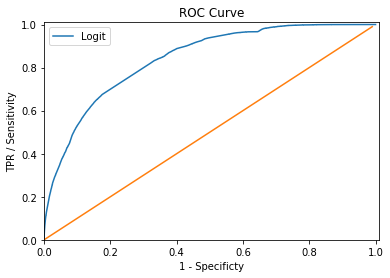

In [25]:
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs)

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['Logit'])
plt.show()

In [26]:
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-Logit= 0.840192038586125


In [27]:
joblib.dump(result, './Modelos/Ensamble/Ensamble_+Tf-idf_LR.sav')

['./Modelos/Ensamble/Ensamble_+Tf-idf_LR.sav']

## Empeoró. Descarto.